# E-599 HIGH PERFORMANCE BIG DATA COMPUTING


## Final Project: INDYCAR VIDEO CRASH DETECTION USING SPATIO-TEMPORAL AUTOENCODER


In [ ]:
from google.colab import drive
drive.mount('/content/GDrive')



Drive already mounted at /content/GDrive; to attempt to forcibly remount, call drive.mount("/content/GDrive", force_remount=True).


## Preprocessing

### Train and test data loading

In [ ]:
ls

GDrive/  sample_data/


In [ ]:
cd /content/GDrive/'My Drive'/Project/Training/

/content/GDrive/My Drive/Project/Training


In [ ]:
!unzip /content/GDrive/'My Drive'/Project/Training.zip

Archive:  /content/GDrive/My Drive/Project/Training.zip
  inflating: V1.mp4                  
  inflating: V10.mp4                 
  inflating: V11.mp4                 
  inflating: V12.mp4                 
  inflating: V13.mp4                 
  inflating: V14.mp4                 
  inflating: V15.mp4                 
  inflating: V16.mp4                 
  inflating: V17.mp4                 
  inflating: V18.mp4                 
  inflating: V19.mp4                 
  inflating: V2.mp4                  
  inflating: V20.mp4                 
  inflating: V21.mp4                 
  inflating: V22.mp4                 
  inflating: V23.mp4                 
  inflating: V24.mp4                 
  inflating: V25.mp4                 
  inflating: V26.mp4                 
  inflating: V27.mp4                 
  inflating: V28.mp4                 
  inflating: V29.mp4                 
  inflating: V3.mp4                  
  inflating: V30.mp4                 
  inflating: V31.mp4            

### Packages Required

In [ ]:
from keras.preprocessing.image import img_to_array,load_img
import numpy as np
import glob
import os 
from skimage.transform import resize
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, EarlyStopping
# from model import load_model
import numpy as np 
from keras.layers import Conv3D,ConvLSTM2D,Conv3DTranspose
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf

#### FFmpeg Installation

In [ ]:
#@title <font size="5">← ឵឵<i>Upgrade FFmpeg to v4.2.2</font> { vertical-output: true, display-mode: "code" }
from IPython.display import clear_output
import os, urllib.request
HOME = os.path.expanduser("~")
pathDoneCMD = f'{HOME}/doneCMD.sh'
if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/yunooooo/gcct/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    loadingAn,
    textAn,
)

loadingAn(name="lds")
textAn("Installing Dependencies...", ty='twg')
os.system('pip install git+git://github.com/AWConant/jikanpy.git')
os.system('add-apt-repository -y ppa:jonathonf/ffmpeg-4')
os.system('apt-get update')
os.system('apt install mediainfo')
os.system('apt-get install ffmpeg')
clear_output()
print('Installation finished.')

Installation finished.


### Training Data: frames extraction and grayscale conversion

In [ ]:
ls

V10.mp4  V15.mp4  V20.mp4  V25.mp4  V2.mp4   V34.mp4  V39.mp4  V6.mp4
V11.mp4  V16.mp4  V21.mp4  V26.mp4  V30.mp4  V35.mp4  V3.mp4   V7.mp4
V12.mp4  V17.mp4  V22.mp4  V27.mp4  V31.mp4  V36.mp4  V40.mp4  V8.mp4
V13.mp4  V18.mp4  V23.mp4  V28.mp4  V32.mp4  V37.mp4  V4.mp4   V9.mp4
V14.mp4  V19.mp4  V24.mp4  V29.mp4  V33.mp4  V38.mp4  V5.mp4


In [ ]:
cd ..

/content/GDrive/My Drive/Project


In [ ]:
def pre_process(fps,source,destination):
	imagestore=[]

	video_source_path= './'+str(source)#args.source_vid_path
	fps=1/fps

	def create_dir(path):
		if not os.path.exists(path):
			os.makedirs(path)

	def remove_old_images(path):
		filelist = glob.glob(os.path.join(path, "*.png"))
		for f in filelist:
			os.remove(f)

	def store(image_path):
		
		img=load_img(image_path)
		img=img_to_array(img)
		img=resize(img,(227,227,3))
		gray=0.2989*img[:,:,0]+0.5870*img[:,:,1]+0.1140*img[:,:,2]
		imagestore.append(gray)



	#List of all Videos in the Source Directory.
	videos=os.listdir(video_source_path)
	print(len(videos),source,"videos found.")


	#Make a temp dir to store all the frames
	create_dir(video_source_path+'/frames')

	#Remove old images
	remove_old_images(video_source_path+'/frames')

	framepath=video_source_path+'/frames'

	for i,video in enumerate(videos):
			os.system( 'ffmpeg -i {}/{} -r 1/{}  {}/frames/%03d.jpg'.format(video_source_path,video,fps,video_source_path))
			images=os.listdir(framepath)
			f = len(images) - len(images)%10
			print('Video:',i+1,'  Frames:',f)
			for image in images[:f]:
					image_path=framepath+ '/'+ image
					store(image_path)


	imagestore=np.array(imagestore)
	a,b,c=imagestore.shape
	#Reshape to (227,227,batch_size)
	imagestore.resize(b,c,a)
	#Normalize
	imagestore=(imagestore-imagestore.mean())/(imagestore.std())
	#Clip negative Values
	imagestore=np.clip(imagestore,0,1)
	np.save(str(destination)+'.npy',imagestore)
	#Remove Buffer Directory
	os.system('rm -r {}'.format(framepath))


In [ ]:
pre_process(10, 'Training', 'Train')

40 Training videos found.
Video: 1   Frames: 600
Video: 2   Frames: 600
Video: 3   Frames: 600
Video: 4   Frames: 600
Video: 5   Frames: 600
Video: 6   Frames: 600
Video: 7   Frames: 600
Video: 8   Frames: 600
Video: 9   Frames: 600
Video: 10   Frames: 600
Video: 11   Frames: 600
Video: 12   Frames: 620
Video: 13   Frames: 620
Video: 14   Frames: 620
Video: 15   Frames: 620
Video: 16   Frames: 620
Video: 17   Frames: 620
Video: 18   Frames: 620
Video: 19   Frames: 620
Video: 20   Frames: 620
Video: 21   Frames: 620
Video: 22   Frames: 620
Video: 23   Frames: 620
Video: 24   Frames: 620
Video: 25   Frames: 620
Video: 26   Frames: 620
Video: 27   Frames: 620
Video: 28   Frames: 620
Video: 29   Frames: 620
Video: 30   Frames: 620
Video: 31   Frames: 620
Video: 32   Frames: 620
Video: 33   Frames: 620
Video: 34   Frames: 620
Video: 35   Frames: 620
Video: 36   Frames: 620
Video: 37   Frames: 620
Video: 38   Frames: 620
Video: 39   Frames: 620
Video: 40   Frames: 620


In [ ]:
pre_process(10, 'Validation', 'Val')

10 Validation videos found.
Video: 1   Frames: 600
Video: 2   Frames: 600
Video: 3   Frames: 600
Video: 4   Frames: 600
Video: 5   Frames: 620
Video: 6   Frames: 620
Video: 7   Frames: 620
Video: 8   Frames: 620
Video: 9   Frames: 620
Video: 10   Frames: 620


## Training

In [ ]:
X_train=np.load('Train.npy')
X_val = np.load('Val.npy')

In [ ]:
frames=X_train.shape[2]
frames=frames-frames%10
X_train=X_train[:,:,:frames]
print(X_train.shape)
X_train=X_train.reshape(-1,227,227,10)
print(X_train.shape)
X_train=np.expand_dims(X_train,axis=4)
print(X_train.shape)

(227, 227, 24580)
(2458, 227, 227, 10)
(2458, 227, 227, 10, 1)


In [ ]:
frames=X_val.shape[2]
frames=frames-frames%10
X_val=X_val[:,:,:frames]
X_val=X_val.reshape(-1,227,227,10)
X_val=np.expand_dims(X_val,axis=4)

In [ ]:
model=Sequential()
model.add(Conv3D(filters=128,kernel_size=(11,11,1),strides=(4,4,1),padding='valid',input_shape=(227,227,10,1),activation='tanh'))
model.add(Conv3D(filters=64,kernel_size=(5,5,1),strides=(2,2,1),padding='valid',activation='tanh'))

model.add(ConvLSTM2D(filters=64,kernel_size=(3,3),strides=1,padding='same',dropout=0.2,recurrent_dropout=0.1,return_sequences=True))
model.add(ConvLSTM2D(filters=32,kernel_size=(3,3),strides=1,padding='same',dropout=0.2,return_sequences=True))
model.add(ConvLSTM2D(filters=64,kernel_size=(3,3),strides=1,return_sequences=True, padding='same',dropout=0.2))

model.add(Conv3DTranspose(filters=128,kernel_size=(5,5,1),strides=(2,2,1),padding='valid',activation='tanh'))
model.add(Conv3DTranspose(filters=1,kernel_size=(11,11,1),strides=(4,4,1),padding='valid',activation='tanh'))

model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001
),loss='mse',metrics=['accuracy'])

callback_save = ModelCheckpoint("Model_1.h5",
									monitor='val_loss', save_best_only=True)
callback_early_stopping = EarlyStopping(monitor='val_loss', patience=3)

#Y_train=X_train.copy()
epochs = 100
batch_size = 1

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_2 (Conv3D)            (None, 55, 55, 10, 128)   15616     
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 26, 26, 10, 64)    204864    
_________________________________________________________________
conv_lst_m2d_3 (ConvLSTM2D)  (None, 26, 26, 10, 64)    295168    
_________________________________________________________________
conv_lst_m2d_4 (ConvLSTM2D)  (None, 26, 26, 10, 32)    110720    
_________________________________________________________________
conv_lst_m2d_5 (ConvLSTM2D)  (None, 26, 26, 10, 64)    221440    
_________________________________________________________________
conv3d_transpose_2 (Conv3DTr (None, 55, 55, 10, 128)   204928    
_________________________________________________________________
conv3d_transpose_3 (Conv3DTr (None, 227, 227, 10, 1)  

In [ ]:
history = model.fit(X_train,X_train, validation_data=(X_val,X_val),
			  batch_size=batch_size,
			  epochs=epochs,
			  callbacks = (callback_save,callback_early_stopping)
			  )

Epoch 1/100
2458/2458 [==============================] - 1639s 667ms/step - loss: 0.0762 - accuracy: 0.6377 - val_loss: 0.0484 - val_accuracy: 0.6662
Epoch 2/100
2458/2458 [==============================] - 1649s 671ms/step - loss: 0.0420 - accuracy: 0.6753 - val_loss: 0.0373 - val_accuracy: 0.6780
Epoch 3/100
2458/2458 [==============================] - 1644s 669ms/step - loss: 0.0313 - accuracy: 0.6859 - val_loss: 0.0281 - val_accuracy: 0.6879
Epoch 4/100
2458/2458 [==============================] - 1622s 660ms/step - loss: 0.0264 - accuracy: 0.6911 - val_loss: 0.0255 - val_accuracy: 0.6910
Epoch 5/100
2458/2458 [==============================] - 1646s 670ms/step - loss: 0.0224 - accuracy: 0.6945 - val_loss: 0.0210 - val_accuracy: 0.6946
Epoch 6/100
2458/2458 [==============================] - 1654s 673ms/step - loss: 0.0182 - accuracy: 0.6966 - val_loss: 0.0160 - val_accuracy: 0.6967
Epoch 7/100
2458/2458 [==============================] - 1628s 662ms/step - loss: 0.0158 - accuracy:

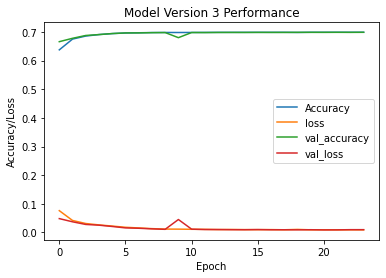

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])

plt.title("Model Version 3 Performance")
plt.ylabel("Accuracy/Loss")
plt.xlabel("Epoch")
plt.legend(["Accuracy","loss","val_accuracy","val_loss"])
plt.show()

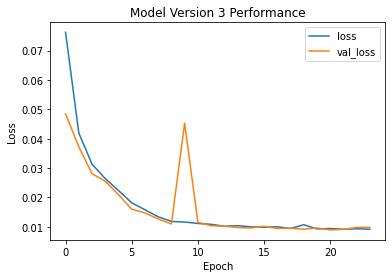

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title("Model Version 3 Performance")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","val_loss"])
plt.show()

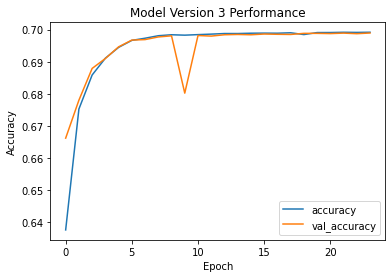

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Version 3 Performance")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["accuracy","val_accuracy"])
plt.show()

In [ ]:
cd ..

/content/GDrive/My Drive/Project


In [ ]:
os.system('rm -r {}'.format(framepath)) # Clearing the temporary folder

0

## *Test*

In [ ]:
cd ..

/content/GDrive/My Drive/Project


In [ ]:
os.system('rm -r {}'.format(framepath))

0

In [ ]:
import matplotlib.image as mpimg
imagestore=[]
count=0
video_source_path= './Test1' 
fps=1/10

def create_dir(path):
	if not os.path.exists(path):
		os.makedirs(path)

def remove_old_images(path):
	filelist = glob.glob(os.path.join(path, "*.png"))
	for f in filelist:
		os.remove(f)

def store(image_path):
	img=load_img(image_path)
	img=img_to_array(img)


	#Resize the Image to (227,227,3) for the network to be able to process it. 


	img=resize(img,(227,227,3))

	#Convert the Image to Grayscale


	gray=0.2989*img[:,:,0]+0.5870*img[:,:,1]+0.1140*img[:,:,2]

	imagestore.append(gray)



#List of all Videos in the Source Directory.
videos=os.listdir(video_source_path)
print("Found ",len(videos)," Testing videos")


#Make a temp dir to store all the frames
create_dir(video_source_path+'/frames')

#Remove old images
remove_old_images(video_source_path+'/frames')

framepath=video_source_path+'/frames'

for video in videos:
    os.system( 'ffmpeg -i {}/{} -r 1/{}  {}/frames/%03d.jpg'.format(video_source_path,video,fps,video_source_path))
    images=os.listdir(framepath)
    f = len(images) - len(images)%10
    print(f)
    for image in images[:f]:        
        image_path=framepath+ '/'+ image
        store(image_path)
        image1 = mpimg.imread(image_path)
        count+=1
        if count%10 ==0 :
          print(count,'-----------------------------------------------------------------------------------------')
        plt.imshow(image1)
        plt.show()
/

imagestore=np.array(imagestore)
print(imagestore.shape)
a,b,c=imagestore.shape
#Reshape to (227,227,batch_size)
imagestore.resize(b,c,a)
#Normalize
imagestore=(imagestore-imagestore.mean())/(imagestore.std())
#Clip negative Values
imagestore=np.clip(imagestore,0,1)
np.save('temp.npy',imagestore)
#Remove Buffer Directory
#os.system('rm -r {}'.format(framepath))


### Threshold Calculation

In [ ]:
def threshold_calc(train_loss,sensitivity):
  
  mean_loss = np.mean(train_loss)
  std_dev  = np.std(train_loss)
  thres = mean_loss + sensitivity*(std_dev)
  return thres


In [ ]:
def mean_squared_loss(x1,x2):

	diff=x1-x2
	a,b,c,d,e=diff.shape
	n_samples=a*b*c*d*e
	sq_diff=diff**2
	Sum=sq_diff.sum()
	dist=np.sqrt(Sum)
	mean_dist=dist/n_samples

	return mean_dist

def train_threshold(sensitivity):

  loss_val=[]
  model = tf.keras.models.load_model('Model_1.h5')

  X_test=np.load('Train_temp.npy')
  frames=X_test.shape[2]

  flag=0 #Overall video flagq

  frames=frames-frames%10

  X_test=X_test[:,:,:frames]
  X_test=X_test.reshape(-1,227,227,10)
  X_test=np.expand_dims(X_test,axis=4)

  for number,bunch in enumerate(X_test):
    n_bunch=np.expand_dims(bunch,axis=0)
    reconstructed_bunch=model.predict(n_bunch)


    loss=mean_squared_loss(n_bunch,reconstructed_bunch)
    
    loss_val.append(loss)
  
  threshold = threshold_calc(loss_val,sensitivity)

  return threshold


### Predicting using the trained model

In [ ]:
from keras.models import load_model
import numpy as np 

losses=[]
loss_val=[]
threshold= train_threshold(2)
print("Calculated Thresold:",threshold)


model = tf.keras.models.load_model('Model_1.h5')

X_test=np.load('temp.npy')
print('Data Transformations:')
print(X_test.shape)
frames=X_test.shape[2]
#Need to make number of frames divisible by 10


flag=0 #Overall video flagq

frames=frames-frames%10

X_test=X_test[:,:,:frames]
X_test=X_test.reshape(-1,227,227,10)
print(X_test.shape)
X_test=np.expand_dims(X_test,axis=4)
print(X_test.shape)

for number,bunch in enumerate(X_test):
	n_bunch=np.expand_dims(bunch,axis=0)
	if number==0:
		print(n_bunch.shape)
		
	reconstructed_bunch=model.predict(n_bunch)


	loss=mean_squared_loss(n_bunch,reconstructed_bunch)
	
	loss_val.append(loss)

	if loss>threshold:
		print("Anomaly Detected at bunch",number+1, "-------Loss:",loss_val[-1])
		flag=1
		losses.append(1)


	else:
		print("Bunch Normal-------Loss:",loss_val[-1])
		losses.append(0)


Calculated Thresold: 0.00031161561389853097
Data Transformations:
(227, 227, 200)
(20, 227, 227, 10)
(20, 227, 227, 10, 1)
(1, 227, 227, 10, 1)
Bunch Normal-------Loss: 0.00026396031997758543
Bunch Normal-------Loss: 0.00026289511560692765
Bunch Normal-------Loss: 0.00027578600735220097
Bunch Normal-------Loss: 0.0002775749892505919
Bunch Normal-------Loss: 0.00026907677741046
Bunch Normal-------Loss: 0.0002836733819923459
Bunch Normal-------Loss: 0.0003086241627514967
Anomaly Detected at bunch 8 -------Loss: 0.00031741135850837633
Anomaly Detected at bunch 9 -------Loss: 0.00031243123491633655
Anomaly Detected at bunch 10 -------Loss: 0.0003266157879354041
Bunch Normal-------Loss: 0.0003005872176877947
Bunch Normal-------Loss: 0.00029808769484439285
Anomaly Detected at bunch 13 -------Loss: 0.0003283436505793461
Anomaly Detected at bunch 14 -------Loss: 0.00032199719776272826
Anomaly Detected at bunch 15 -------Loss: 0.00033488412149438907
Anomaly Detected at bunch 16 -------Loss: 0.0

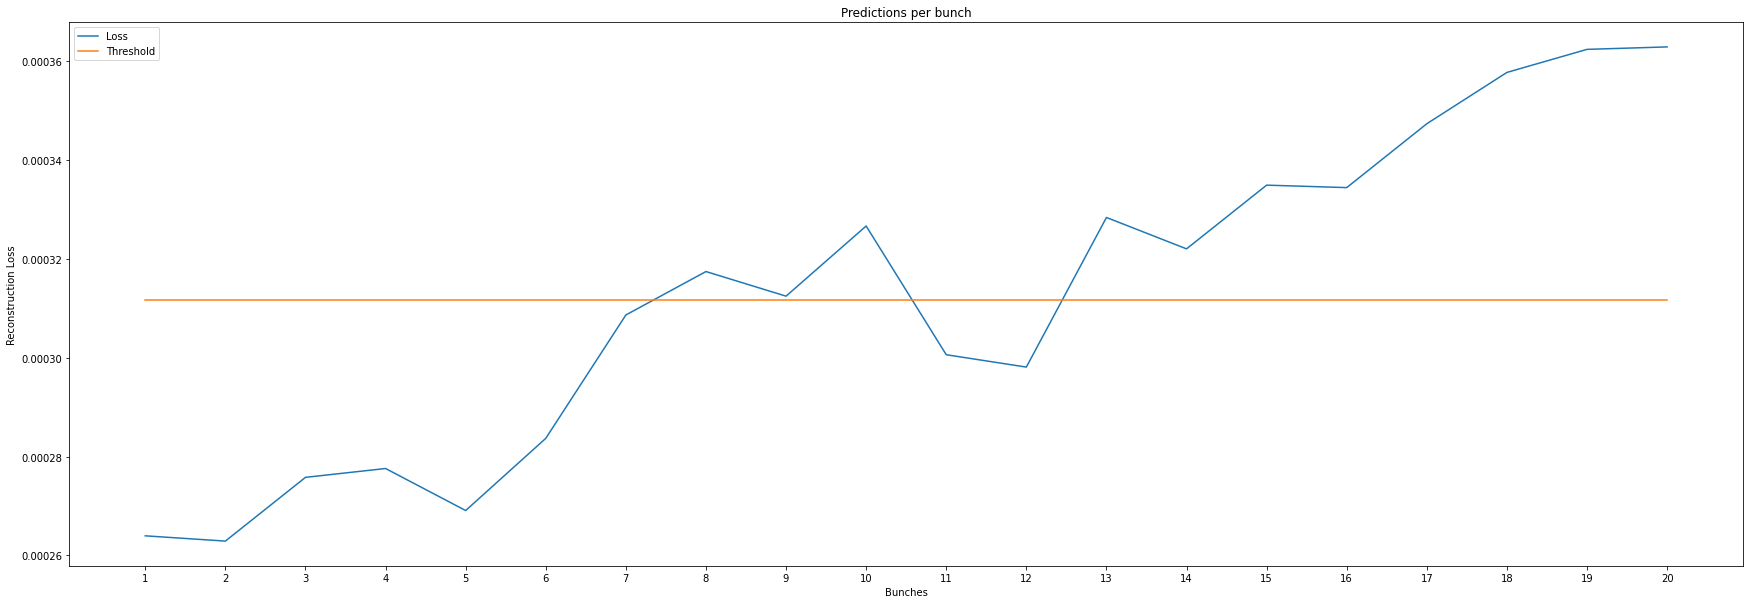

In [ ]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
x = np.array([str(i+1) for i in range(len(loss_val))])
ax.plot(x,loss_val)
ax.plot([threshold]*len(loss_val))
plt.xlabel('Bunches')
plt.ylabel('Reconstruction Loss')
plt.title('Predictions per bunch')
plt.legend(['Loss','Threshold'])
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
labels = np.load('labels.npy')
print('AUC score of the selected video:')
print(roc_auc_score(labels,losses))

AUC score of the selected video:
0.9583333333333333
